# Zadanie 6

Celem ćwiczenia jest implementacja algorytmu Q-learning.

Następnie należy stworzyć agenta rozwiązującego problem [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/). Problem dostępny jest w pakiecie **gym**.

Punktacja (max 7 pkt):
- Implementacja algorytmu Q-learning. [3 pkt]
- Eksperymenty dla różnych wartości hiperparametrów [2 pkt]
- Jakość kodu [1 pkt]
- Wnioski [1 pkt]

Polecane źródła - teoria + intuicja:
- https://distill.pub/2019/paths-perspective-on-value-learning/
- https://www.youtube.com/watch?v=0iqz4tcKN58&ab_channel=SteveBrunton

In [47]:
from dataclasses import dataclass
from matplotlib import pyplot as plt
import numpy as np
import gymnasium as gym

In [46]:
class QLearningSolver:
    """Class containing the Q-learning algorithm that might be used for different discrete environments."""

    def __init__(
        self,
        observation_space: int,     # X
        action_space: int,          # A
        learning_rate: float = 0.1,
        gamma: float = 0.9,
        epsilon: float = 0.1,
    ):
        self.observation_space = observation_space
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

        self.Q_table = np.zeros((observation_space, action_space))

    def __call__(self, state: int, action: int) -> float:
        """Return Q-value of given state and action."""
        return self.Q_table[state, action]
    
    def _best_next_action(self, next_state: int) -> int:
        return np.argmax(self.Q_table[next_state])
    
    def _calc_td_target(
            self,
            next_state: int,
            reward: float
        ) -> float:
        """
        Oblicz Temporal Difference Target:
        TD_target = r + y * max(Q(s', a'))
        """

        best_action: int = self._best_next_action(next_state)

        return reward + self.gamma * self.Q_table[next_state, best_action]

    def update(
            self,
            state: int,
            action: int,
            next_state: int,
            reward: float,
            done: bool
        ) -> None:
        """
        Update Q-value of given state and action.

        Q(s, a) ← Q(s, a) + alpha * [r + y * max(Q(s', a')) - Q(s, a)]

        """
        Q: int = self.Q_table[state, action]

        if done:
            # terminal state, no future rewards
            TD_target = reward
        else:
            # not terminal state, td formula
            TD_target = reward + self.gamma * np.max(self.Q_table[next_state])

        self.Q_table[state, action] = Q + self.learning_rate * (TD_target - Q)
    
    def _exploration(self) -> int:
        return np.random.choice(self.action_space)
    
    def _exploitation(self, state: np.ndarray) -> int:
        return np.argmax(self.Q_table[state])

    def get_best_action(self, state: np.ndarray) -> np.ndarray:
        """Return action that maximizes Q-value for a given state."""
        if np.random.rand() < self.epsilon:
            return self._exploration()

        return self._exploitation(state)

    def __repr__(self):
        """Elegant representation of Q-learning solver."""
        return f"QLearningSolver(observation_space={self.observation_space}, action_space={self.action_space})"

    def __str__(self):
        return self.__repr__()

In [51]:
@dataclass
class Hyperparameters:
    learning_rate: int = 0.1
    gamma: int = 0.9
    epsilon: int = 0.1

    def data(self):
        return self.learning_rate, self.gamma, self.epsilon

In [49]:
class Environment:

    @staticmethod
    def run(hyperparameters: Hyperparameters, episodes: int, training: bool = True, render: bool = False) -> None:
        env = gym.make('Taxi-v3', render_mode='human' if render else None)

        observation_space: int = env.observation_space.n
        action_space: int = env.action_space.n

        learning_rate, gamma, epsilon = hyperparameters.data()

        Q_solver = QLearningSolver(
            observation_space=observation_space,
            action_space=action_space,
            learning_rate=learning_rate,
            gamma=gamma,
            epsilon=epsilon
        )


        rewards = []
        for episode in range(episodes):
            state: int = env.reset()[0]
            total_reward: int = 0
            done: bool = False

            while not done:
                action = Q_solver.get_best_action(state)
                next_state, reward, done, _, _ = env.step(action)

                if training:
                    Q_solver.update(state, action, next_state, reward, done)
                
                total_reward += reward
                state = next_state
            
            rewards.append(total_reward)

        env.close()
        return rewards
    


In [48]:
EPISODES = 100
LOADS_OF_EPISODES = 10000

LEARNING_RATES = [0.1, 0.5, 0.9]
EPSILONS = [0.1, 0.3, 0.9]
GAMMAS = [0.3, 0.7, 0.9]

# Eksperymenty

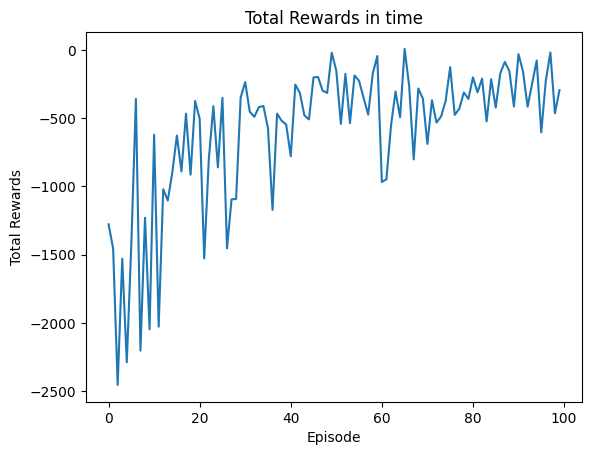

In [50]:
rewards = Environment.run(Hyperparameters(), EPISODES, True, False)

plt.plot(range(EPISODES), rewards)
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.title('Total Rewards in time')
plt.show()

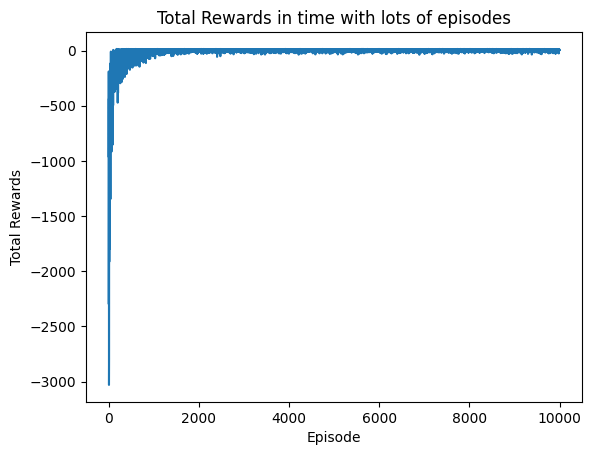

In [54]:
rewards = Environment.run(Hyperparameters(), LOADS_OF_EPISODES, True, False)

plt.plot(range(LOADS_OF_EPISODES), rewards)
plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.title('Total Rewards in time with lots of episodes')
plt.show()

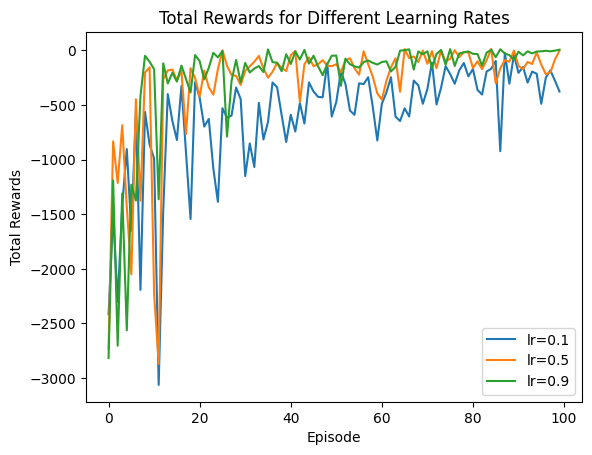

In [52]:
for lr in LEARNING_RATES:
    rewards = Environment.run(Hyperparameters(learning_rate=lr), EPISODES, True, False)
    plt.plot(range(EPISODES), rewards, label=f'lr={lr}')

plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.title('Total Rewards for Different Learning Rates')
plt.legend()
plt.show()


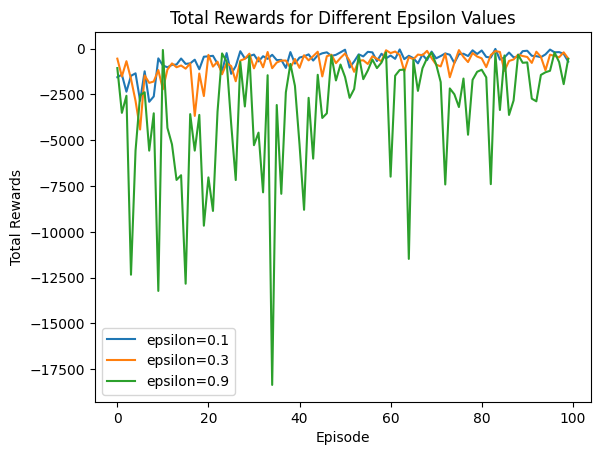

In [55]:
for epsilon in EPSILONS:
    rewards = Environment.run(Hyperparameters(epsilon=epsilon), EPISODES, True, False)
    plt.plot(range(EPISODES), rewards, label=f'epsilon={epsilon}')

plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.title('Total Rewards for Different Epsilon Values')
plt.legend()
plt.show()


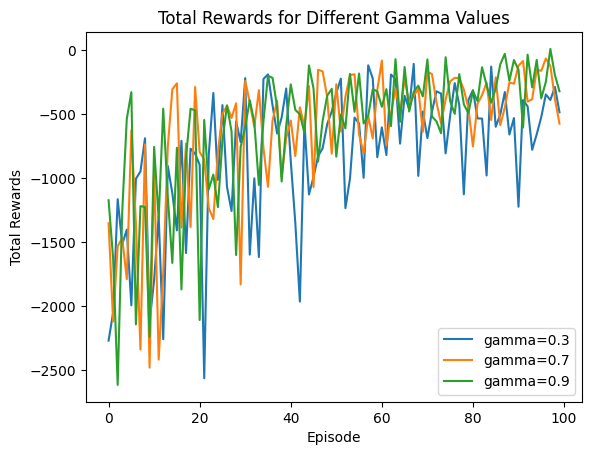

In [53]:
for gamma in GAMMAS:
    rewards = Environment.run(Hyperparameters(gamma=gamma), EPISODES, True, False)
    plt.plot(range(EPISODES), rewards, label=f'gamma={gamma}')

plt.xlabel('Episode')
plt.ylabel('Total Rewards')
plt.title('Total Rewards for Different Gamma Values')
plt.legend()
plt.show()


# Wnioski